--- Univariate Analysis ---
           RAM (GB)  Screen Size (inch)  Battery Life (hours)   Weight (kg)  \
count  11768.000000        11768.000000          11768.000000  11768.000000   
mean      24.852821           15.212305              8.027855      2.341117   
std       21.762567            1.436997              2.305400      0.667921   
min        4.000000           13.300000              4.000000      1.200000   
25%        8.000000           14.000000              6.000000      1.760000   
50%       16.000000           15.600000              8.000000      2.340000   
75%       32.000000           16.000000             10.000000      2.910000   
max       64.000000           17.300000             12.000000      3.500000   

          Price ($)  
count  11768.000000  
mean    2183.571608  
std     1316.886132  
min      279.570000  
25%     1272.045000  
50%     1840.865000  
75%     2698.370000  
max    10807.880000  


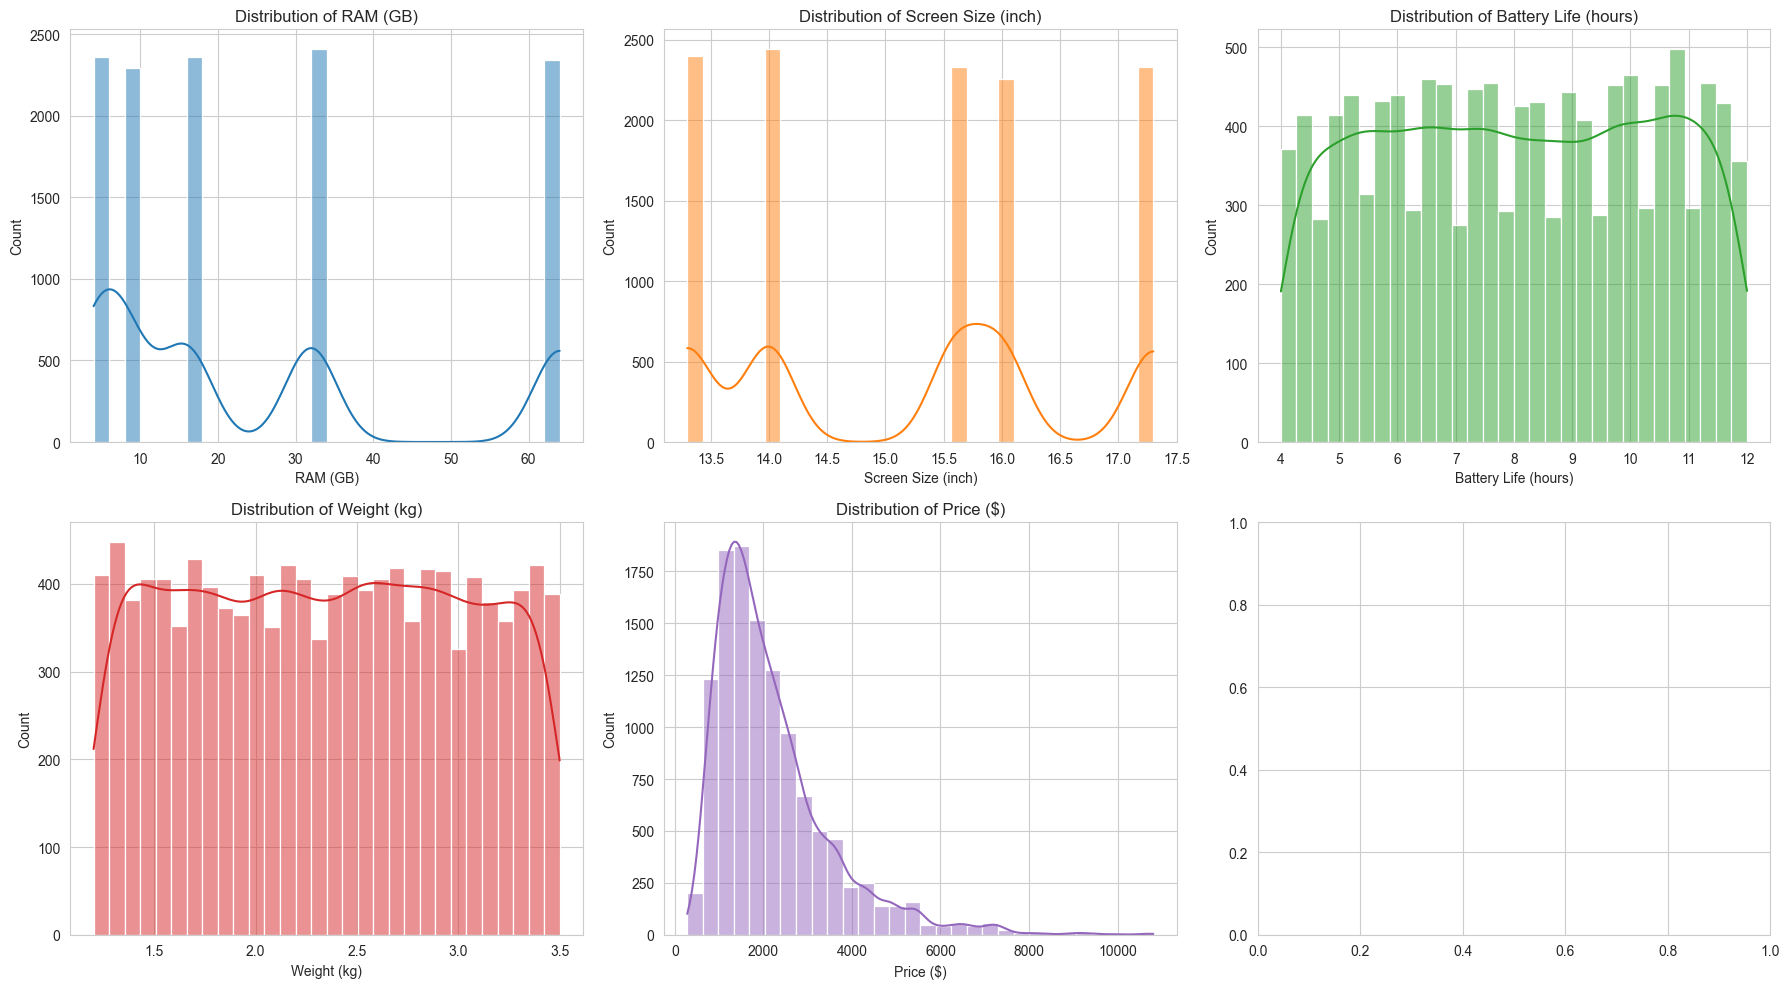

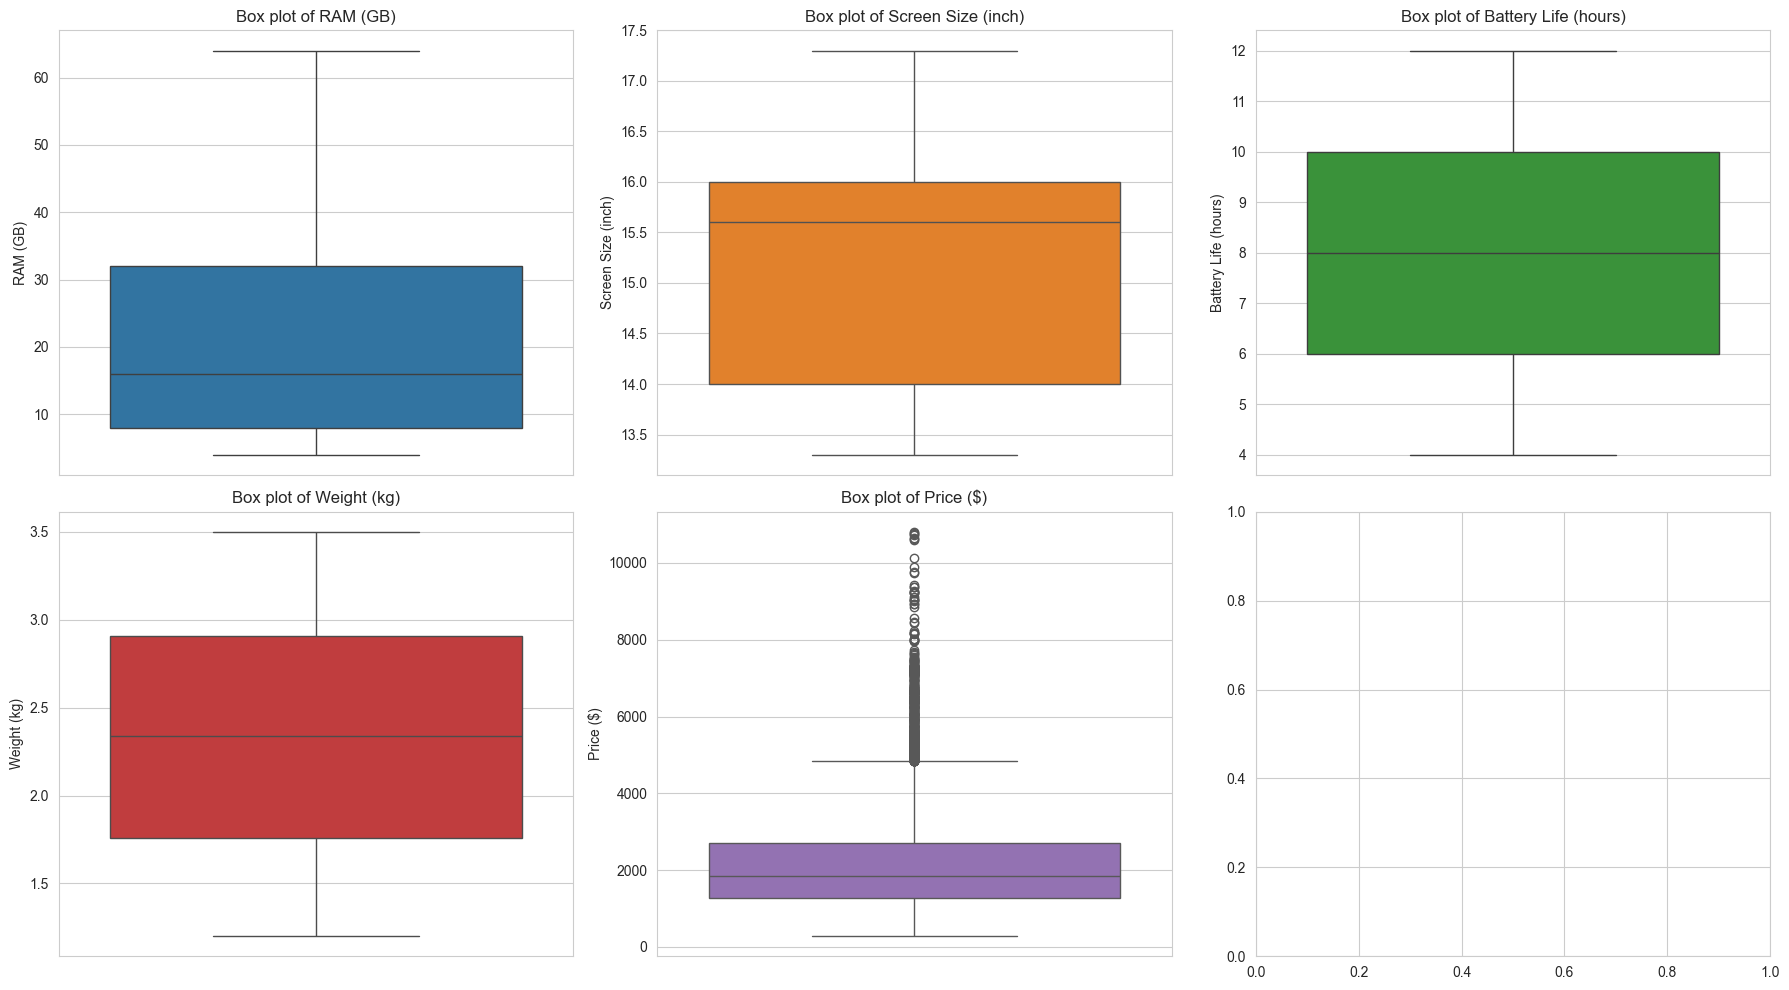

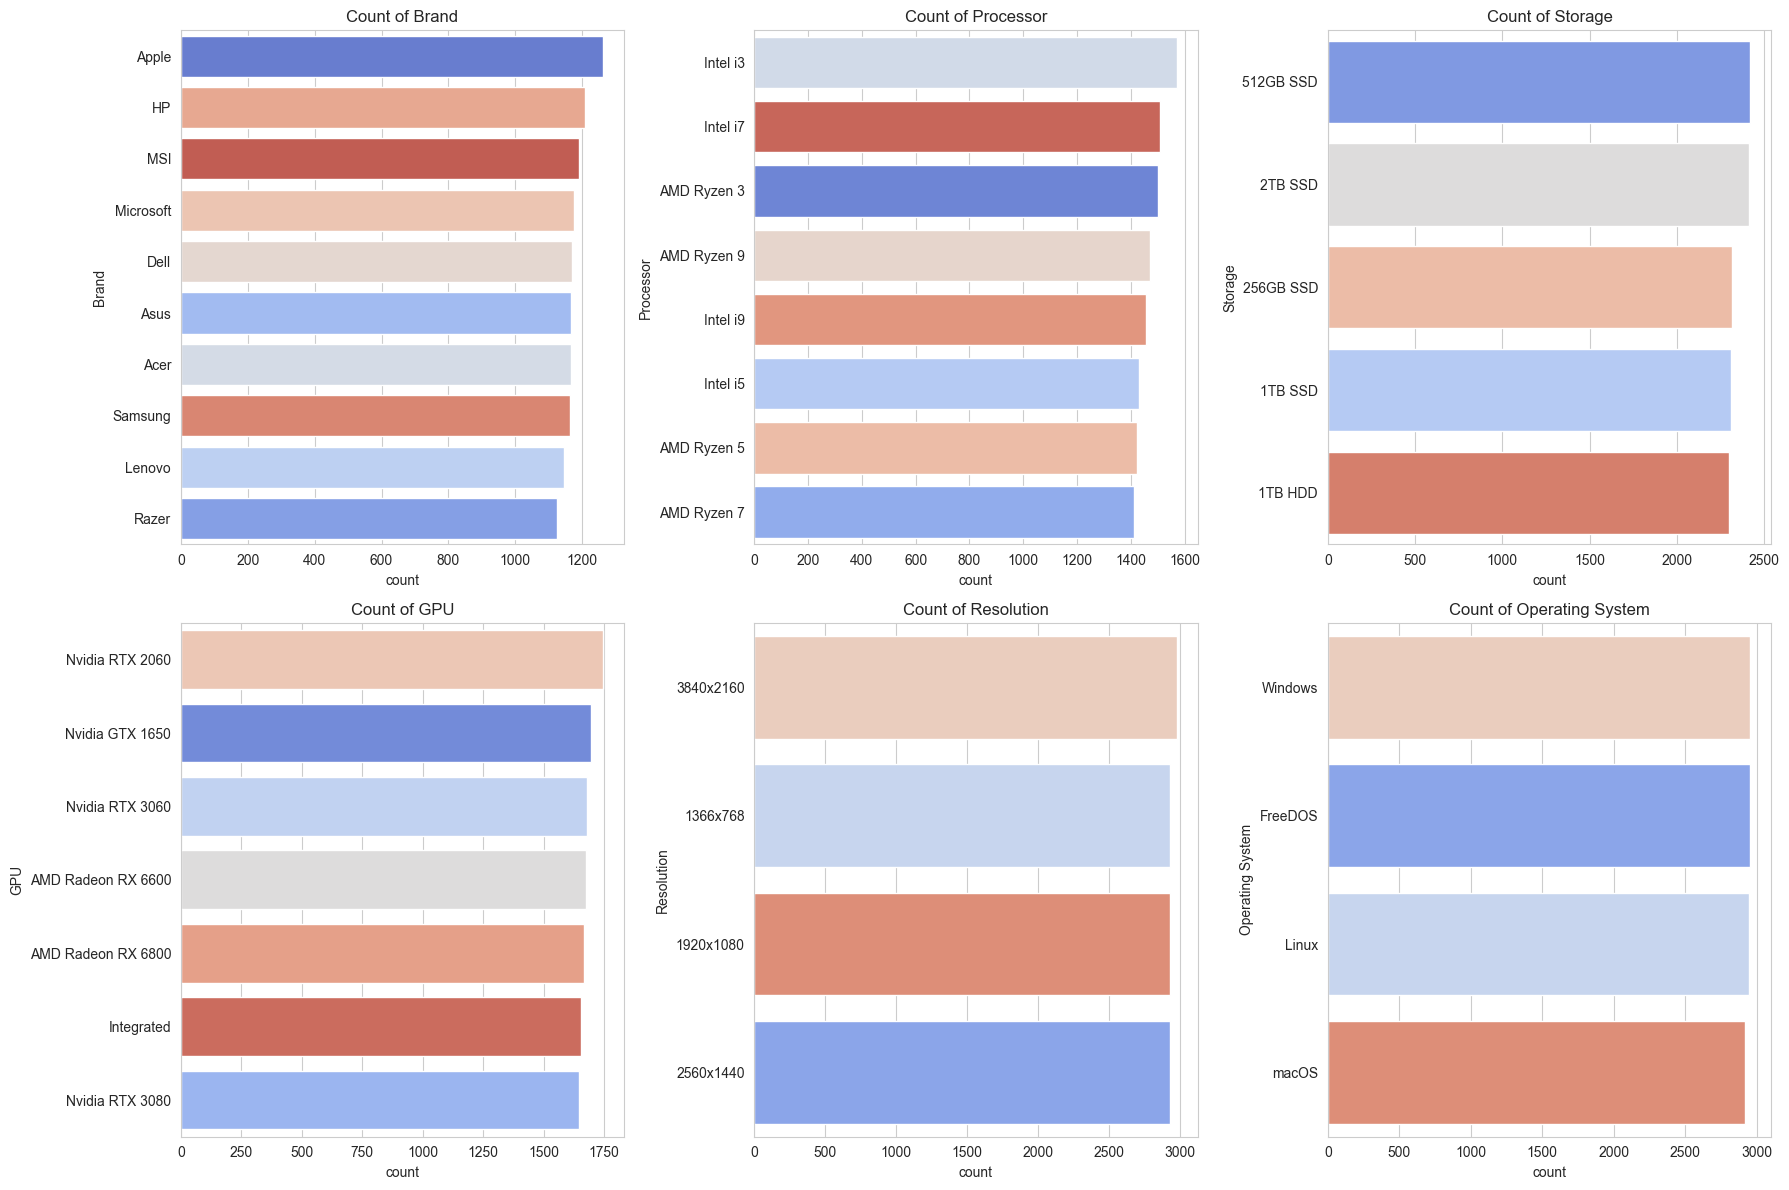

--- Multivariate Analysis ---


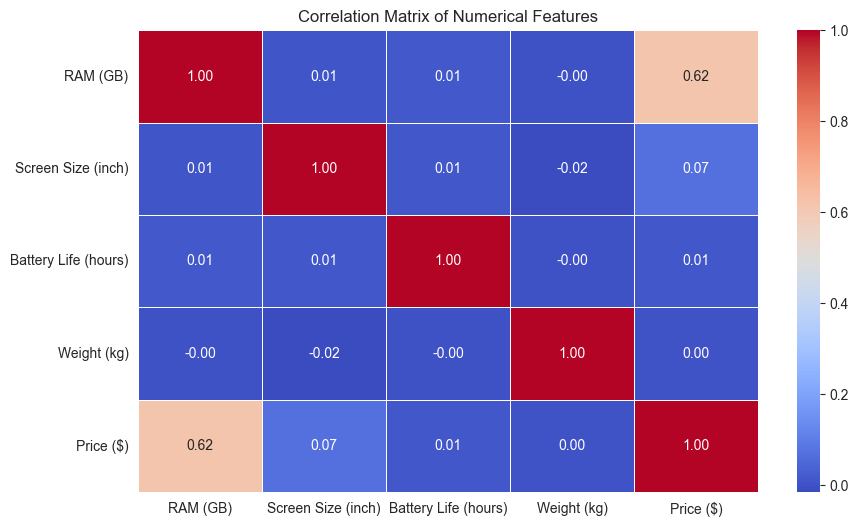

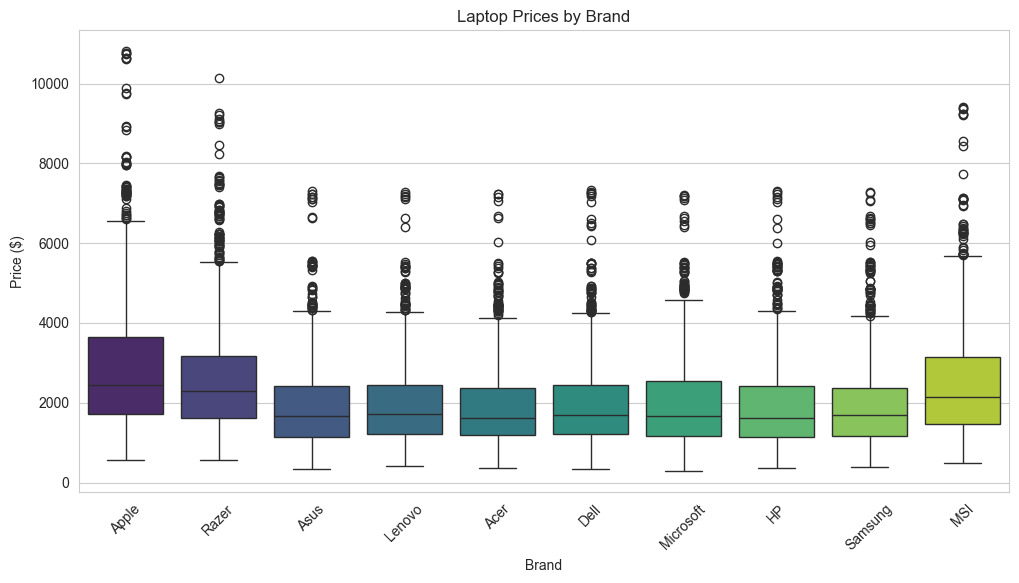

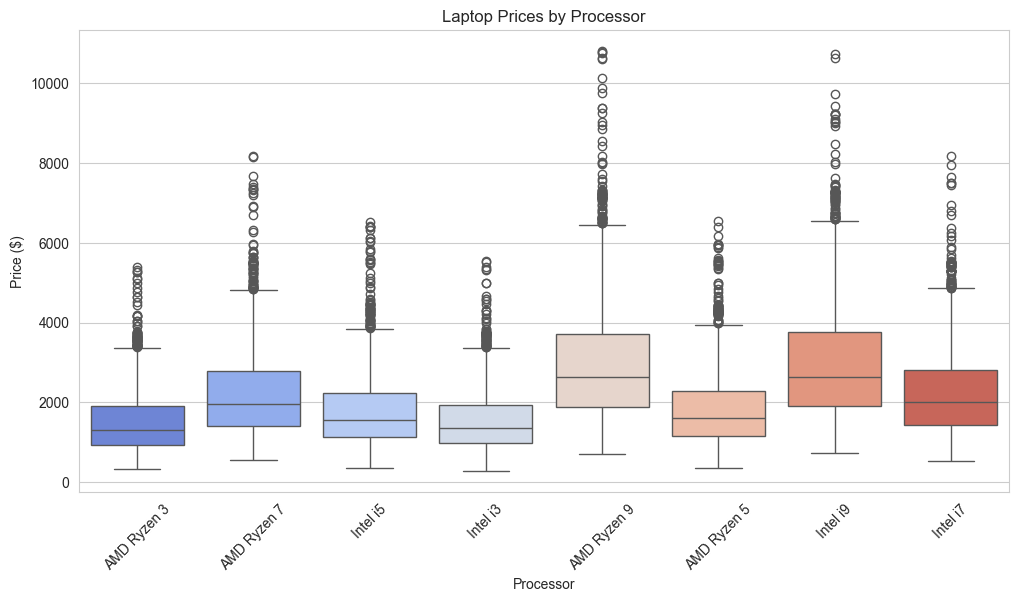

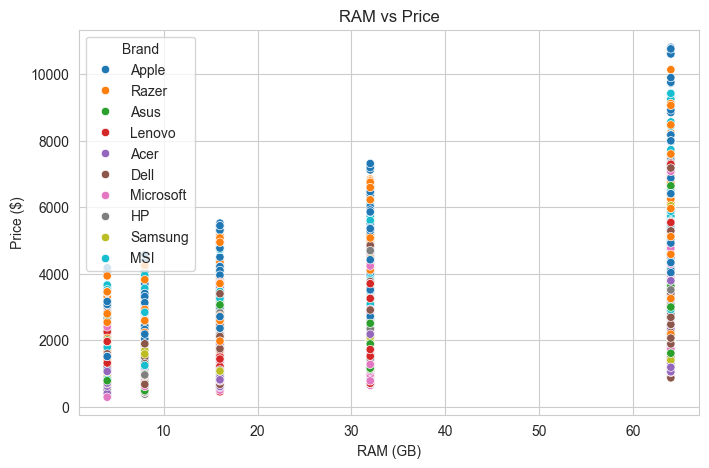

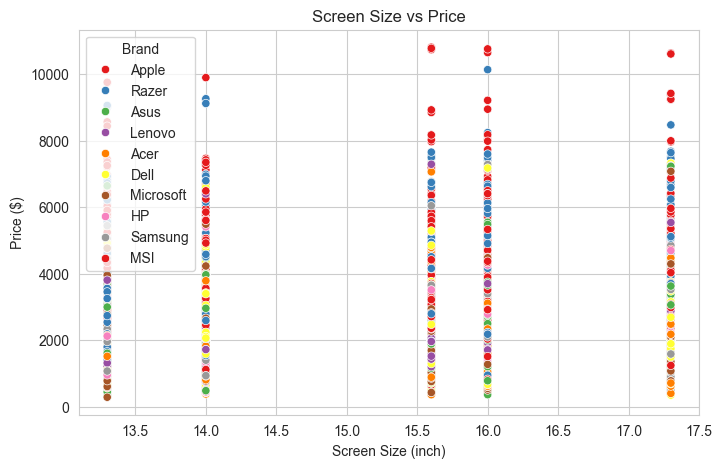

Analysis complete. Insights can be derived from the plots and statistics.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("laptop_prices.csv")

# Set style
sns.set_style("whitegrid")

# ---------------- UNIVARIATE ANALYSIS ----------------
print("--- Univariate Analysis ---")

# Summary statistics
print(df.describe())

# Histograms for numerical features
num_cols = ["RAM (GB)", "Screen Size (inch)", "Battery Life (hours)", "Weight (kg)", "Price ($)"]
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"]

for i, col in enumerate(num_cols):
    ax = axes[i // 3, i % 3]
    sns.histplot(df[col], bins=30, kde=True, ax=ax, color=colors[i])
    ax.set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

# Box plots for numerical features
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
for i, col in enumerate(num_cols):
    ax = axes[i // 3, i % 3]
    sns.boxplot(y=df[col], ax=ax, color=colors[i])
    ax.set_title(f"Box plot of {col}")

plt.tight_layout()
plt.show()

# Count plots for categorical variables
cat_cols = ["Brand", "Processor", "Storage", "GPU", "Resolution", "Operating System"]
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

for i, col in enumerate(cat_cols):
    ax = axes[i // 3, i % 3]
    sns.countplot(y=df[col], order=df[col].value_counts().index, hue=df[col], legend=False, palette="coolwarm", ax=ax)
    ax.set_title(f"Count of {col}")

plt.tight_layout()
plt.show()

# ---------------- MULTIVARIATE ANALYSIS ----------------
print("--- Multivariate Analysis ---")

# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

# Price variation by Brand
plt.figure(figsize=(12, 6))
sns.boxplot(x="Brand", y="Price ($)", data=df, hue="Brand", dodge=False, palette="viridis")
plt.xticks(rotation=45)
plt.title("Laptop Prices by Brand")
plt.show()

# Price variation by Processor
plt.figure(figsize=(12, 6))
sns.boxplot(x="Processor", y="Price ($)", data=df, hue="Processor", dodge=False, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Laptop Prices by Processor")
plt.show()

# Relationship between RAM and Price
plt.figure(figsize=(8, 5))
sns.scatterplot(x="RAM (GB)", y="Price ($)", data=df, hue="Brand", palette="tab10")
plt.title("RAM vs Price")
plt.show()

# Relationship between Screen Size and Price
plt.figure(figsize=(8, 5))
sns.scatterplot(x="Screen Size (inch)", y="Price ($)", data=df, hue="Brand", palette="Set1")
plt.title("Screen Size vs Price")
plt.show()

print("Analysis complete. Insights can be derived from the plots and statistics.")
